In [215]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Connecting the two data sets together and making it one 

In [216]:

columns =["age","workclass","fnlwgt","education","education.num","marital.status","occupation","relationship","race","sex","capital.gain","capital.loss","hours.per.week","native.country","income"]
training_f = pd.read_csv("adult.data", sep=",\s", header = None, engine = 'python',names=columns)
testing_f = pd.read_csv("adult.test", sep=",\s", header = None, engine = 'python',names=columns)

testing_f.loc[:, 'income'] = testing_f['income'].replace(regex=True, to_replace=r'\.', value=r'')
data_f = pd.concat([testing_f,training_f])
data_f.reset_index(drop=True, inplace=True)
data_f

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,|1x3 Cross validator,None,NaN,None,NaN,None,None,None,None,None,NaN,NaN,NaN,None,None
1,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K
2,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K
3,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K
4,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48838,27,Private,257302.0,Assoc-acdm,12.0,Married-civ-spouse,Tech-support,Wife,White,Female,0.0,0.0,38.0,United-States,<=50K
48839,40,Private,154374.0,HS-grad,9.0,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0.0,0.0,40.0,United-States,>50K
48840,58,Private,151910.0,HS-grad,9.0,Widowed,Adm-clerical,Unmarried,White,Female,0.0,0.0,40.0,United-States,<=50K
48841,22,Private,201490.0,HS-grad,9.0,Never-married,Adm-clerical,Own-child,White,Male,0.0,0.0,20.0,United-States,<=50K


In [217]:
data_f = data_f.drop(index=0)
data_f = data_f.reset_index(drop=True)
data_f

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K
1,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K
2,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K
3,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K
4,18,?,103497.0,Some-college,10.0,Never-married,?,Own-child,White,Female,0.0,0.0,30.0,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302.0,Assoc-acdm,12.0,Married-civ-spouse,Tech-support,Wife,White,Female,0.0,0.0,38.0,United-States,<=50K
48838,40,Private,154374.0,HS-grad,9.0,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0.0,0.0,40.0,United-States,>50K
48839,58,Private,151910.0,HS-grad,9.0,Widowed,Adm-clerical,Unmarried,White,Female,0.0,0.0,40.0,United-States,<=50K
48840,22,Private,201490.0,HS-grad,9.0,Never-married,Adm-clerical,Own-child,White,Male,0.0,0.0,20.0,United-States,<=50K


In [218]:
data_f.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

76.1% has a salary greater than $50K and only 23.9% has a salary less than $50k , therefore it means that there is an imblanace in the dataset. 

([<matplotlib.patches.Wedge at 0x316fd4700>,
 [Text(0.13270858417163967, -1.0919653985759616, '<=50K'),
  Text(-0.13270853305305033, 1.0919654047884977, '>50K')],
 [Text(0.07238650045725799, -0.5956174901323427, '76.1%'),
  Text(-0.07238647257439108, 0.5956174935209987, '23.9%')])

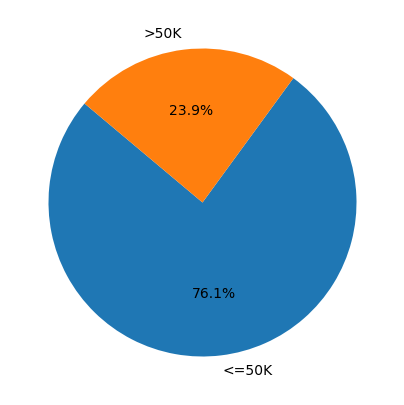

In [219]:
inc_amounts = data_f['income'].value_counts()

plt.figure(figsize=(5,5))
plt.pie(inc_amounts, labels=inc_amounts.index, autopct='%1.1f%%', startangle=140)

Droping the rows which have " ? " symbol instead of any values

In [220]:
data_f[data_f == '?'] = np.nan
data_f = data_f.dropna()
data_f

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K
1,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K
2,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K
3,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K
5,34,Private,198693.0,10th,6.0,Never-married,Other-service,Not-in-family,White,Male,0.0,0.0,30.0,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302.0,Assoc-acdm,12.0,Married-civ-spouse,Tech-support,Wife,White,Female,0.0,0.0,38.0,United-States,<=50K
48838,40,Private,154374.0,HS-grad,9.0,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0.0,0.0,40.0,United-States,>50K
48839,58,Private,151910.0,HS-grad,9.0,Widowed,Adm-clerical,Unmarried,White,Female,0.0,0.0,40.0,United-States,<=50K
48840,22,Private,201490.0,HS-grad,9.0,Never-married,Adm-clerical,Own-child,White,Male,0.0,0.0,20.0,United-States,<=50K


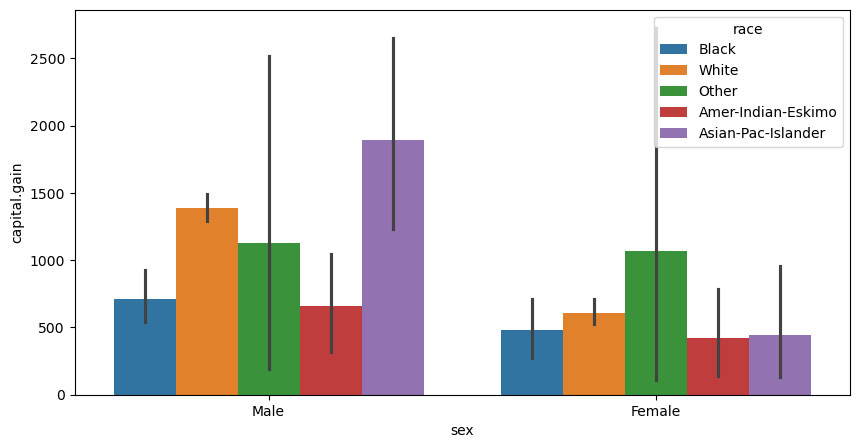

In [221]:
plt.figure(figsize=(10,5))
sns.barplot(x ='sex' , y='capital.gain', data = data_f,hue='race')
plt.xlabel=('Sex')
plt.ylabel=('Capital Gain')

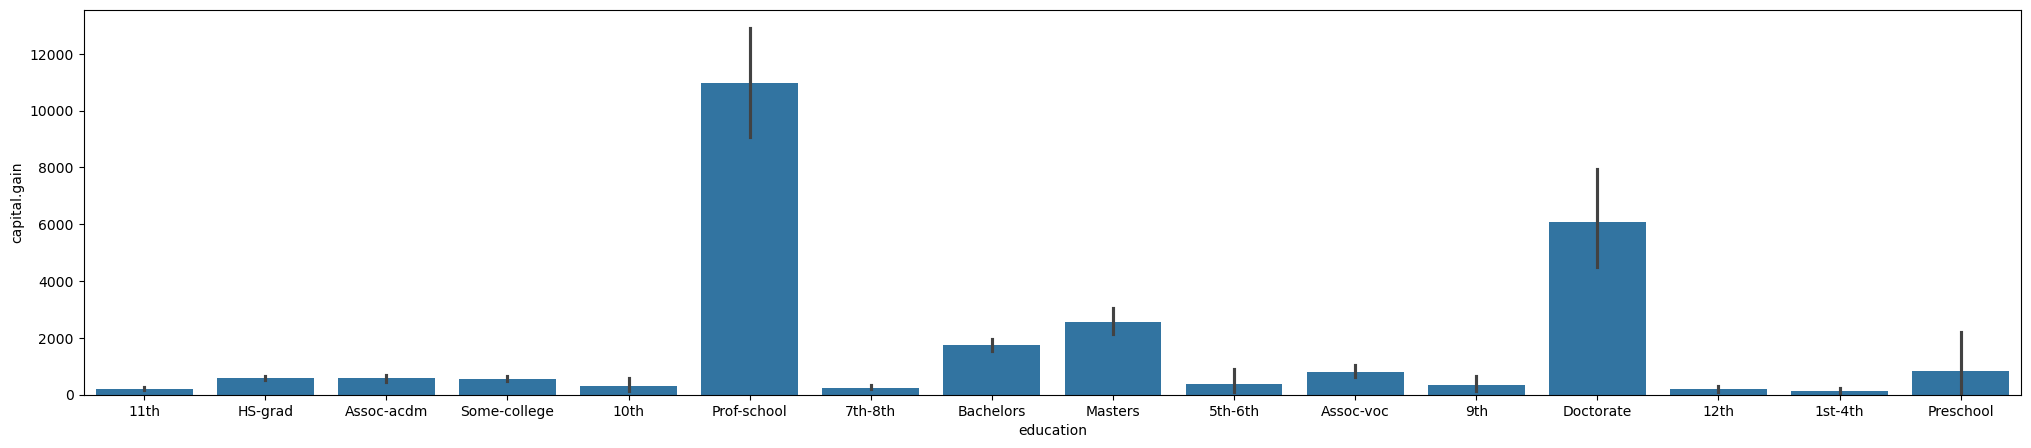

In [222]:
plt.figure(figsize=(25,5))
sns.barplot(x ='education' , y='capital.gain', data = data_f)
plt.xlabel=('Sex')
plt.ylabel=('Capital Gain')

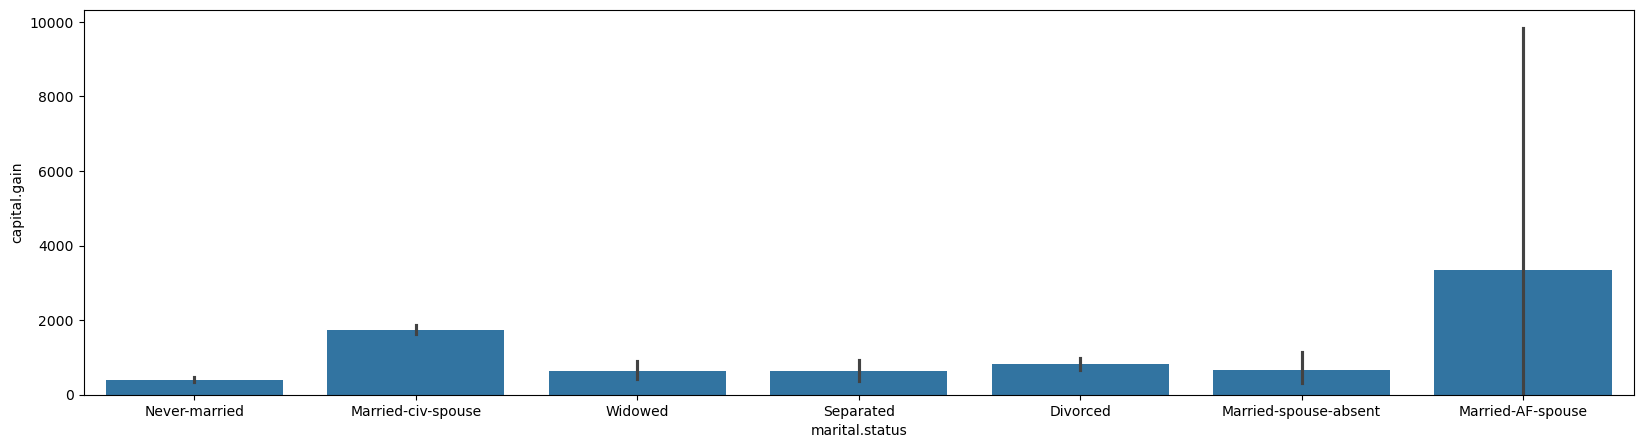

In [223]:
plt.figure(figsize=(20,5))
sns.barplot(x ='marital.status' , y='capital.gain', data = data_f)
plt.xlabel=('Sex')
plt.ylabel=('Capital Gain')

In [224]:
data_f['income'].replace({'<=50K':0, '>50K':1}, inplace=True)
data_f

/var/folders/dc/5z3pbmdn0y7432jf8nxdqh9r0000gn/T/ipykernel_7182/1548234469.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_f['income'].replace({'<=50K':0, '>50K':1}, inplace=True)
/var/folders/dc/5z3pbmdn0y7432jf8nxdqh9r0000gn/T/ipykernel_7182/1548234469.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcas

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,0
1,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,0
2,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,1
3,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,1
5,34,Private,198693.0,10th,6.0,Never-married,Other-service,Not-in-family,White,Male,0.0,0.0,30.0,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302.0,Assoc-acdm,12.0,Married-civ-spouse,Tech-support,Wife,White,Female,0.0,0.0,38.0,United-States,0
48838,40,Private,154374.0,HS-grad,9.0,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0.0,0.0,40.0,United-States,1
48839,58,Private,151910.0,HS-grad,9.0,Widowed,Adm-clerical,Unmarried,White,Female,0.0,0.0,40.0,United-States,0
48840,22,Private,201490.0,HS-grad,9.0,Never-married,Adm-clerical,Own-child,White,Male,0.0,0.0,20.0,United-States,0


Feature Extraction 

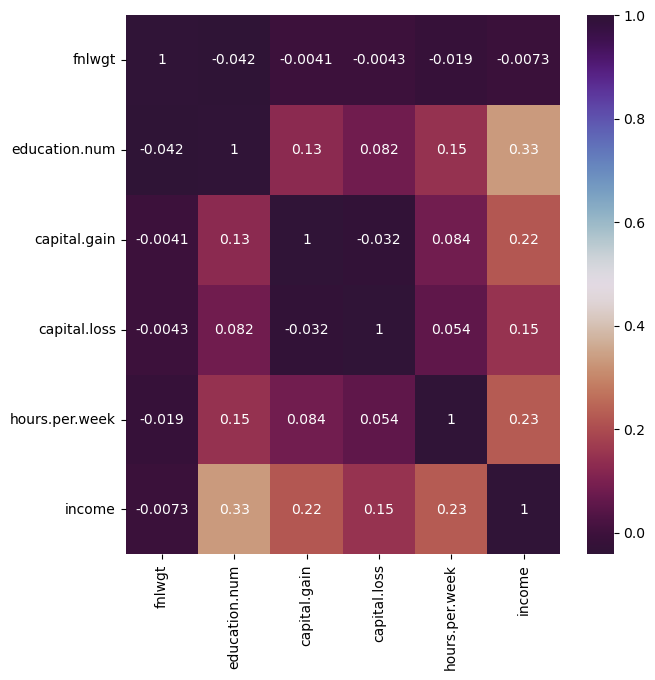

In [225]:
corr_df = data_f.select_dtypes(include = 'number')
correlation_matrix = corr_df.corr()
plt.figure(figsize=(7,7)) 
sns.heatmap(correlation_matrix, annot=True, cmap='twilight_shifted_r')
plt.show()

Can drop the education column as its redundant

In [226]:
data_f = data_f.drop('education', axis=1)
data_f.head()

,age,workclass,fnlwgt,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,25,Private,226802.0,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,0
1,38,Private,89814.0,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,0
2,28,Local-gov,336951.0,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,1
3,44,Private,160323.0,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,1
5,34,Private,198693.0,6.0,Never-married,Other-service,Not-in-family,White,Male,0.0,0.0,30.0,United-States,0


fnlwgt has a (-)ve correlation with income, therefore it can be dropped 

In [227]:
data_f = data_f.drop('fnlwgt', axis=1)
data_f.head()

,age,workclass,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,25,Private,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,0
1,38,Private,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,0
2,28,Local-gov,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,1
3,44,Private,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,1
5,34,Private,6.0,Never-married,Other-service,Not-in-family,White,Male,0.0,0.0,30.0,United-States,0


In [228]:
data_f['age'] = data_f['age'].astype(int)
data_f.dtypes

age                 int64
workclass          object
education.num     float64
marital.status     object
occupation         object
relationship       object
race               object
sex                object
capital.gain      float64
capital.loss      float64
hours.per.week    float64
native.country     object
income              int64
dtype: object

One Hot Encoding , for categorical columns


In [229]:

str_cols = data_f.columns[data_f.dtypes == object].tolist()
data_f = pd.get_dummies(data_f, columns=str_cols)
data_f

,age,education.num,capital.gain,capital.loss,hours.per.week,income,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,...,native.country_Portugal,native.country_Puerto-Rico,native.country_Scotland,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia
0,25,7.0,0.0,0.0,40.0,0,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
1,38,9.0,0.0,0.0,50.0,0,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
2,28,12.0,0.0,0.0,40.0,1,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
3,44,10.0,7688.0,0.0,40.0,1,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
5,34,6.0,0.0,0.0,30.0,0,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,12.0,0.0,0.0,38.0,0,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
48838,40,9.0,0.0,0.0,40.0,1,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
48839,58,9.0,0.0,0.0,40.0,0,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
48840,22,9.0,0.0,0.0,20.0,0,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False


Min Max scaler , for numerical columns 

In [230]:
from sklearn.preprocessing import MinMaxScaler

scalable_columns = ['age','capital.gain','capital.loss','hours.per.week', "education.num"] 
min_max_scaler = MinMaxScaler() 
scaled_columns = min_max_scaler.fit_transform(data_f[scalable_columns]) 

data_f['age']=scaled_columns[:,0]
data_f['capital.gain']=scaled_columns[:,1]
data_f['capital.loss']=scaled_columns[:,2]
data_f['hours.per.week']=scaled_columns[:,3]
data_f["education.num"]=scaled_columns[:,4]

data_f

,age,education.num,capital.gain,capital.loss,hours.per.week,income,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,...,native.country_Portugal,native.country_Puerto-Rico,native.country_Scotland,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia
0,0.109589,0.400000,0.000000,0.0,0.397959,0,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
1,0.287671,0.533333,0.000000,0.0,0.500000,0,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
2,0.150685,0.733333,0.000000,0.0,0.397959,1,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
3,0.369863,0.600000,0.076881,0.0,0.397959,1,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
5,0.232877,0.333333,0.000000,0.0,0.295918,0,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,0.136986,0.733333,0.000000,0.0,0.377551,0,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
48838,0.315068,0.533333,0.000000,0.0,0.397959,1,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
48839,0.561644,0.533333,0.000000,0.0,0.397959,0,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
48840,0.068493,0.533333,0.000000,0.0,0.193878,0,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False


In [231]:
data = data_f.drop('income', axis=1)
target = data_f['income']

In [232]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)
x_train, y_train = SMOTE().fit_resample(x_train, y_train)


In [233]:
len(x_train), len(x_test), len(y_train), len(y_test)

(54344, 9045, 54344, 9045)

Random Forest Classifier with Hyperparameters set as default

In [234]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier

r_forest_Model = RandomForestClassifier(random_state=42)
r_forest_Model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [235]:
r_forest_Model.score(x_train, y_train)

0.9798505814809363

In [236]:
y_Pred = r_forest_Model.predict(x_test)
accuracy_score(y_test, y_Pred)

0.8300718629076838

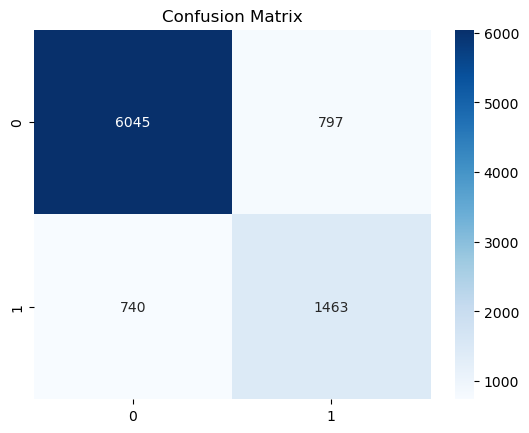

In [237]:
cm = confusion_matrix(y_test, y_Pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel = 'Predicted'
plt.ylabel = 'Actual'
plt.title('Confusion Matrix')
plt.show()

In [238]:
print(classification_report(y_test, y_Pred))


              precision    recall  f1-score   support

           0       0.89      0.88      0.89      6842
           1       0.65      0.66      0.66      2203

    accuracy                           0.83      9045
   macro avg       0.77      0.77      0.77      9045
weighted avg       0.83      0.83      0.83      9045



Random Forest Classifier with changed Hyperparameters (n_estimators=200, max_depth=10, random_state=42,max_features=None,n_jobs=-1)

In [239]:
X_train, X_test, Y_train, Y_test = train_test_split(data, target, test_size=0.1, random_state=42)
X_train, Y_train = SMOTE().fit_resample(X_train, Y_train)


r_forest_Model_1 = RandomForestClassifier( random_state=42)
r_forest_Model_1.fit(X_train, Y_train)

RandomForestClassifier(random_state=42)

In [240]:
r_forest_Model_1.score(X_train, Y_train)

0.978240952817224

In [241]:
Y_Pred = r_forest_Model_1.predict(X_test)
accuracy_score(Y_test, Y_Pred)

0.8386026973247844

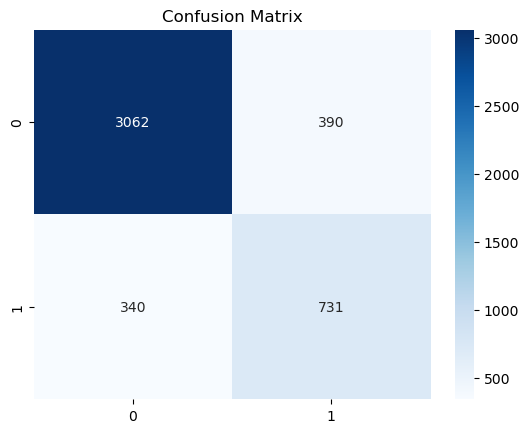

In [242]:
cm = confusion_matrix(Y_test, Y_Pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel = 'Predicted'
plt.ylabel = 'Actual'
plt.title('Confusion Matrix')
plt.show()

In [243]:
print(classification_report(Y_test, Y_Pred))

              precision    recall  f1-score   support

           0       0.90      0.89      0.89      3452
           1       0.65      0.68      0.67      1071

    accuracy                           0.84      4523
   macro avg       0.78      0.78      0.78      4523
weighted avg       0.84      0.84      0.84      4523



In [244]:
X1_train, X1_test, Y1_train, Y1_test = train_test_split(data, target, test_size=0.2, random_state=42)
X1_train, Y1_train = SMOTE().fit_resample(X1_train, Y1_train)


ran_forest = RandomForestClassifier(random_state=42, n_estimators=200,max_depth=20,max_leaf_nodes=50)
ran_forest.fit(X1_train, Y1_train)

RandomForestClassifier(max_depth=20, max_leaf_nodes=50, n_estimators=200,
                       random_state=42)

In [245]:
ran_forest.score(X1_train, Y1_train)

0.8325482113940822

In [246]:
Pred = ran_forest.predict(X1_test)
accuracy_score(Y1_test,Pred)

0.7883913764510779

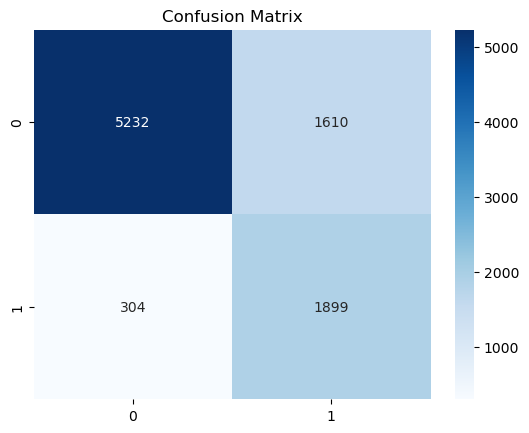

In [247]:
cm = confusion_matrix(Y1_test, Pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel = 'Predicted'
plt.ylabel = 'Actual'
plt.title('Confusion Matrix')
plt.show()

In [248]:
print(classification_report(Y1_test,Pred))

              precision    recall  f1-score   support

           0       0.95      0.76      0.85      6842
           1       0.54      0.86      0.66      2203

    accuracy                           0.79      9045
   macro avg       0.74      0.81      0.76      9045
weighted avg       0.85      0.79      0.80      9045



In [249]:
X2_train, X2_test, Y2_train, Y2_test = train_test_split(data, target, test_size=0.2, random_state=42)
X2_train, Y2_train = SMOTE().fit_resample(X2_train, Y2_train)


random_forest = RandomForestClassifier(random_state=42,min_samples_split=50,min_samples_leaf=50)
random_forest.fit(X2_train, Y2_train)

RandomForestClassifier(min_samples_leaf=50, min_samples_split=50,
                       random_state=42)

In [250]:
random_forest.score(X2_train, Y2_train)

0.8397247166200501

In [251]:
Pred1 = random_forest.predict(X2_test)
accuracy_score(Y2_test,Pred1)

0.7983416252072969

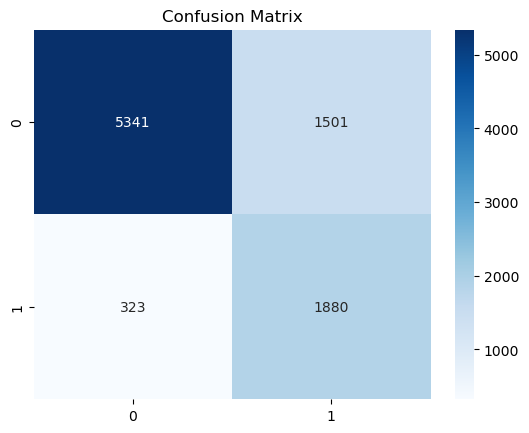

In [252]:
cm = confusion_matrix(Y2_test, Pred1)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel = 'Predicted'
plt.ylabel = 'Actual'
plt.title('Confusion Matrix')
plt.show()

In [253]:
print(classification_report(Y2_test,Pred1))

              precision    recall  f1-score   support

           0       0.94      0.78      0.85      6842
           1       0.56      0.85      0.67      2203

    accuracy                           0.80      9045
   macro avg       0.75      0.82      0.76      9045
weighted avg       0.85      0.80      0.81      9045



In [254]:
from sklearn.naive_bayes import MultinomialNB


xn_train, xn_test, yn_train, yn_test = train_test_split(data, target, test_size=0.2, random_state=42)
xn_train, yn_train = SMOTE().fit_resample(xn_train, yn_train)


naive_bayes = MultinomialNB()
naive_bayes.fit(xn_train, yn_train)

MultinomialNB()

In [255]:
naive_bayes.score(xn_train, yn_train)

0.7718055351096718

In [256]:
nPred = naive_bayes.predict(xn_test)
accuracy_score(yn_test,nPred)

0.7332227750138198

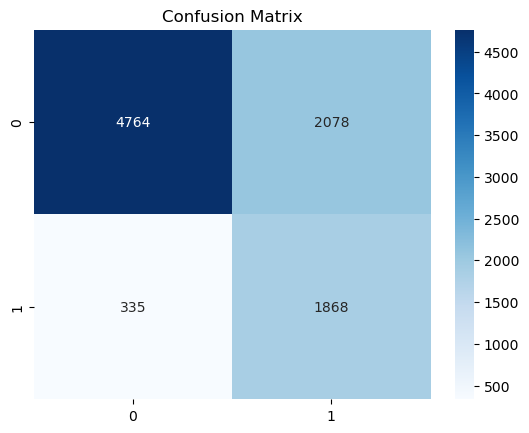

In [257]:
cm = confusion_matrix(yn_test, nPred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel = 'Predicted'
plt.ylabel = 'Actual'
plt.title('Confusion Matrix')
plt.show()

In [258]:
print(classification_report(yn_test,nPred))

              precision    recall  f1-score   support

           0       0.93      0.70      0.80      6842
           1       0.47      0.85      0.61      2203

    accuracy                           0.73      9045
   macro avg       0.70      0.77      0.70      9045
weighted avg       0.82      0.73      0.75      9045



In [259]:
from sklearn.naive_bayes import GaussianNB

xg_train, xg_test, yg_train, yg_test = train_test_split(data, target, test_size=0.2, random_state=42)
xg_train, yg_train = SMOTE().fit_resample(xg_train, yg_train)


naive_bayesG = GaussianNB()
naive_bayesG.fit(xg_train, yg_train)

GaussianNB()

In [260]:
naive_bayesG.score(xg_train, yg_train)

0.7064441336670102

In [261]:
ngPred = naive_bayes.predict(xg_test)
accuracy_score(yg_test,ngPred)

0.7332227750138198

In [262]:
from sklearn.ensemble import GradientBoostingClassifier

xa_train, xa_test, ya_train, ya_test = train_test_split(data, target, test_size=0.2, random_state=42)
xa_train, ya_train = SMOTE().fit_resample(xa_train, ya_train)


GB = GradientBoostingClassifier(random_state=42)

GB.fit(xa_train, ya_train)


GradientBoostingClassifier(random_state=42)

In [263]:
GB.score(xa_train, ya_train)

0.8583652289121154

In [264]:
APred = GB.predict(xa_test)
accuracy_score(ya_test,APred)

0.825649530127142

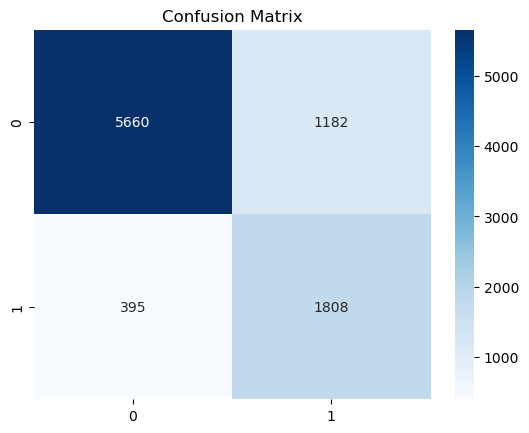

In [265]:
cm = confusion_matrix(ya_test, APred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel = 'Predicted'
plt.ylabel = 'Actual'
plt.title('Confusion Matrix')
plt.show()

In [266]:
print(classification_report(ya_test,APred))

              precision    recall  f1-score   support

           0       0.93      0.83      0.88      6842
           1       0.60      0.82      0.70      2203

    accuracy                           0.83      9045
   macro avg       0.77      0.82      0.79      9045
weighted avg       0.85      0.83      0.83      9045



ROC of Random Forest: 0.883784840448364
ROC of Gaussian NB: 0.8526909108423939
ROC of Multinomial NB: 0.8558883656696783
ROC of Gradient Boosting: 0.9133036943192052


Text(0.5, 1.0, 'ROC Curve')

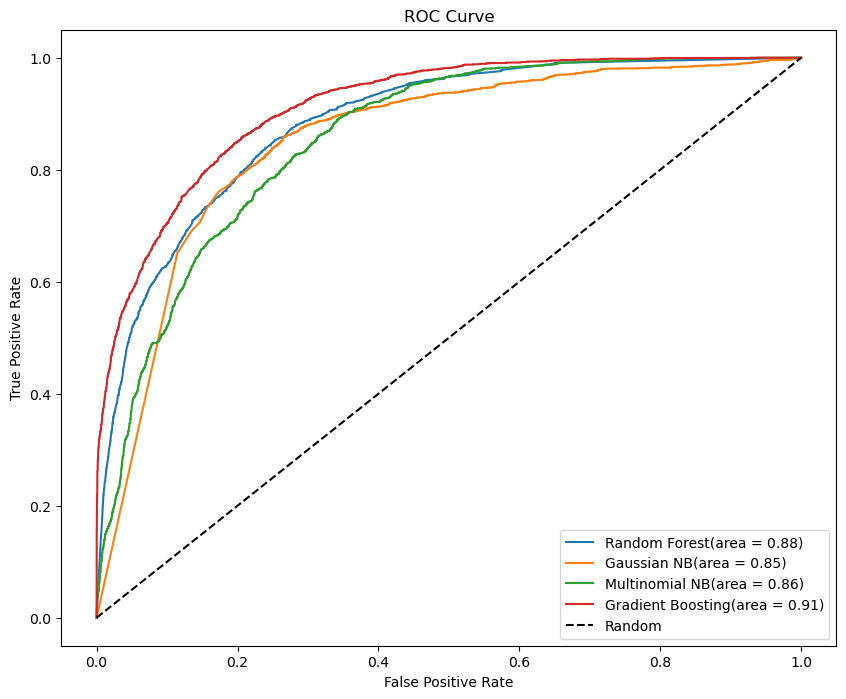

In [267]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as pt

xr_train, xr_test, yr_train, yr_test = train_test_split(data, target, test_size=0.2, random_state=42)
xr_train, yr_train = SMOTE().fit_resample(xr_train, yr_train)

r = RandomForestClassifier(random_state=42)
ng = GaussianNB()
nM = MultinomialNB()
g = GradientBoostingClassifier(random_state=42)

r.fit(xr_train, yr_train)
ng.fit(xr_train, yr_train)
nM.fit(xr_train, yr_train)
g.fit(xr_train, yr_train)

pred_r = r.predict_proba(xr_test)[:,1]
pred_ng = ng.predict_proba(xr_test)[:,1]
pred_nM = nM.predict_proba(xr_test)[:,1]
pred_g = g.predict_proba(xr_test)[:,1]


r_roc = roc_auc_score(yr_test, pred_r)
print(f"ROC of Random Forest: {r_roc}")
ng_roc = roc_auc_score(yr_test, pred_ng)
print(f"ROC of Gaussian NB: {ng_roc}")
nM_roc = roc_auc_score(yr_test, pred_nM)
print(f"ROC of Multinomial NB: {nM_roc}")
g_roc = roc_auc_score(yr_test, pred_g)
print(f"ROC of Gradient Boosting: {g_roc}")

fpr_r, tpr_r, thresholds_r = roc_curve(yr_test, pred_r)
fpr_ng, tpr_ng, thresholds_ng = roc_curve(yr_test, pred_ng)
fpr_nM, tpr_nM, thresholds_nM = roc_curve(yr_test, pred_nM)
fpr_g, tpr_g, thresholds_g = roc_curve(yr_test, pred_g)

plt.figure(figsize=(10,8))
plt.plot(fpr_r, tpr_r, label=f"Random Forest(area = {r_roc:.2f})")
plt.plot(fpr_ng, tpr_ng, label=f"Gaussian NB(area = {ng_roc:.2f})")
plt.plot(fpr_nM, tpr_nM, label=f"Multinomial NB(area = {nM_roc:.2f})")
plt.plot(fpr_g, tpr_g, label=f"Gradient Boosting(area = {g_roc:.2f})")

plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.gca().set_xlabel('False Positive Rate')
plt.gca().set_ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.title('ROC Curve')